# # Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as DataSets
import sklearn.model_selection as cv
import matplotlib.pyplot as plt

In [2]:
def predict(x,m,c):
    y = m*x + c
    return y
    

def GradientDescent(x,y,alpha = 0.0001,epsilon = 0.0001,max_itr = 1000000):
    m = 0
    c = 0
   # print(x.shape[0] , " " , y.shape[0])
    n = x.shape[0]
    error = (((predict(x,m,c)-y)**2).sum())/(2*n)
    cnt = 0
    cost = []
    it = []
    while(error>=epsilon and cnt<=max_itr):
        tmp1 = c - alpha*(m*x.mean() + c/n -y.mean())
        tmp2 = m - alpha*(m*(x*x).mean() + c*x.mean() - (x*y).mean())
        c = tmp1
        m = tmp2
        
        new_error = (((predict(x,m,c)-y)**2).sum())/(2*n)
        error = abs(new_error-error)
        cnt += 1
        
        cost.append(new_error)
        it.append(cnt)
    
    print(" Stopped after ",cnt," iterations !")
    plt.plot(it,cost,color='red')
    plt.show()
    return (m,c)
    

 Stopped after  1599  iterations !


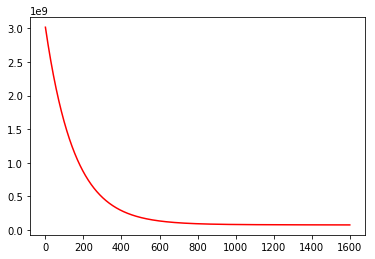

 m =  12980.6518546  c =  3187.74824216


In [3]:
dataset = pd.read_csv("../data/Salary_Data.csv")
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
X_train , X_test ,Y_train , Y_test = cv.train_test_split(X,y,test_size = 0.20 , random_state = 0)
# print(X_train)
# print(Y_train)
m,c = GradientDescent(X_train,Y_train)

yP = predict(X_test,m,c)
print( " m = ",m," c = ",c)

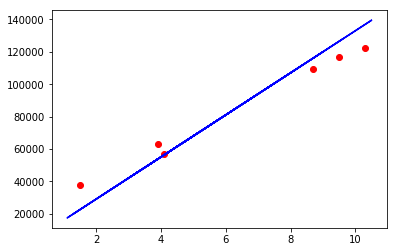

In [4]:
from matplotlib.lines import Line2D
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_train,predict(X_train,m,c),color = 'blue')
plt.show()

In [5]:
def acc(yT,yP):
    num = ((yT-yP)*(yT-yP)).sum()
    den = ((yT-yT.mean())*(yT-yT.mean())).sum()
    score = 1 - num/den
    return score

In [6]:
print(" Score  = ",acc(Y_test,yP))

 Score  =  0.898222229016
